In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names1880 = pd.read_csv('data/yob1880.txt', names=['name', 'sex', 'births'])

In [3]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
names1880.groupby('sex').sum()

,births
sex,
F,90992
M,110490


In [5]:
# load all data
# 2011 is the last available year right now
years = range(1880, 2011)
# initialize an empty list
pieces = []
# and load an individual data frame
# for each of the individual data files
# into that list
for year in years:
    filename = 'data/yob'+str(year)+'.txt'
    frame = pd.read_csv(filename, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)
# concatenate that list into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [6]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [7]:
names.groupby('name').sum().sort_values(by='births')

,births,year
name,,
Zzyzx,5,2010
Deshaunte,5,1992
Shareem,5,2002
Benessa,5,1965
Shareek,5,1991
Lynis,5,1954
Shardul,5,2007
Shardonay,5,1997
Lynissa,5,1978


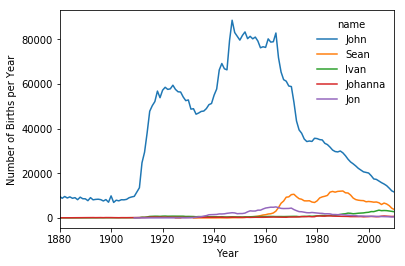

In [8]:
name_counts_by_year = names.pivot_table(values='births',index='year',columns='name',aggfunc=nm.sum)
name_counts_by_year[['John','Sean','Ivan','Johanna','Jon']].plot()
plt.xlabel('Year')
plt.ylabel('Number of Births per Year')
plt.savefig('plot.png',dpi=300)